# **Kaggle Dataset Analysis : Facebook Recruiting IV: Human or Robot ?**

The main goal of this project is to understand the patterns which allows a platform to identify whether an online bid is made by a machine or a human. 

To do so, I am going to investigate the following datasets :
- "train.csv", which includes a list of bidder information, with their id, payment account, and address
- "bids.csv" that includes 7.6 million bids on different auctions

This notebook is organised in three separated parts :

- **PART 1** : is dedicated to the preparation of the dataset to the analysis. In this section, I will firstly process to the **detection** of incomplete, incorrect, inaccurate or irrelevant parts within both datasets. Once I will have identified these data points I will either **replace, modify or delete** the dirty or coarse data.


- **PART 2** : in this section, I will use the cleaned dataset to answer intermediary questions which are aimed to discover the interesting tracks to explore, which deserve to be analysed in greater depth. The questions that will be treated are the following : 
    - **1.** For each auction,identify the number of unique ip addresses
    - **2.** For each merchandise type, identify the country which sent the maximum number of bids (in the csv, include also the number of bids sent by that country)
    - **3.** For each country,the fraction of times a bid from that country was identified as coming from a robot


- **PART 3** : this part is dedicated to the exploration of the interesting patterns identified in part 2 and to visualise the outputs thanks to data visualisation.

Let's start !

# **PART 1. DATA CLEANING**

## **1.1. Reading Datasets**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv("/Users/tangigouez/Desktop/Kaggle_data_source/train.csv", encoding = "UTF-8")

In [3]:
bids = pd.read_csv("/Users/tangigouez/Desktop/Kaggle_data_source/bids.csv", encoding = "UTF-8")

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bidder_id        2013 non-null   object 
 1   payment_account  2013 non-null   object 
 2   address          2013 non-null   object 
 3   outcome          2013 non-null   float64
dtypes: float64(1), object(3)
memory usage: 63.0+ KB


In [5]:
train.head()

,bidder_id,payment_account,address,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0


In [6]:
train.tail()

,bidder_id,payment_account,address,outcome
2008,369515b3af4f8ca582f90271d30b14b6r52aw,a1f85275793c4a782f0a668711f41b927ivc9,e6882cf204a9482edd042b6e31791dfctxzx8,0.0
2009,f939c17ffc7c39ac9b35b69e5e75179fv9pe2,a3d2de7675556553a5f08e4c88d2c2286s1m2,b9b03d5a127eb07aeb9163cdcf524e1344ac9,0.0
2010,c806dbb2decba0ed3c4ff5e2e60a74c2wjvbl,a3d2de7675556553a5f08e4c88d2c22856leq,d02c2b288b8aabd79ff47118aff41a2dqwzwc,0.0
2011,0381a69b7a061e9ace2798fd48f1f537mgq57,fd87037ce0304077079c749f420f0b4c54uo0,f030a221726fbcdfc4dc7dfd1b381a112hieq,0.0
2012,84a769adc98498f52debfe57b93a0789556f4,fbe0ce34d6546ebd9e4c63afc68b085byd2tf,a3d2de7675556553a5f08e4c88d2c228fib6p,0.0


Overall, the train dataset contains 2013 rows and a total of 4 columns. The details of the meaning of each column names are the following : 
- bidder_id – Unique identifier of a bidder.
- payment_account – Payment account associated with a bidder. These are obfuscated to protect privacy. 
- address – Mailing address of a bidder. These are obfuscated to protect privacy. 
- outcome – Label of a bidder indicating whether or not it is a robot. Value 1.0 indicates a robot, where value 0.0 indicates human. 

In [7]:
bids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7656334 entries, 0 to 7656333
Data columns (total 9 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   bid_id       int64 
 1   bidder_id    object
 2   auction      object
 3   merchandise  object
 4   device       object
 5   time         int64 
 6   country      object
 7   ip           object
 8   url          object
dtypes: int64(2), object(7)
memory usage: 525.7+ MB


In [9]:
bids.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


In [8]:
bids.tail()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
7656329,7656329,626159dd6f2228ede002d9f9340f75b7puk8d,3e64w,jewelry,phone91,9709222052631578,ru,140.204.227.63,cghhmomsaxi6pug
7656330,7656330,a318ea333ceee1ba39a494476386136a826dv,xn0y0,mobile,phone236,9709222052631578,pl,24.232.159.118,wgggpdg2gx5pesn
7656331,7656331,f5b2bbad20d1d7ded3ed960393bec0f40u6hn,gja6c,sporting goods,phone80,9709222052631578,za,80.237.28.246,5xgysg14grlersa
7656332,7656332,d4bd412590f5106b9d887a43c51b254eldo4f,hmwk8,jewelry,phone349,9709222052631578,my,91.162.27.152,bhtrek44bzi2wfl
7656333,7656333,0ea62aaa9c3ffcc6db584cb69c1f6c4bcripp,c9ox9,mobile,phone82,9709222052631578,jo,160.243.101.60,vasstdc27m7nks3


The dataset contains more than 7 millions entries and 9 columns. To better understand the meaning of each columns, here is the description of the table :
- bid_id - unique id for this bid
- bidder_id – Unique identifier of a bidder (same as the bidder_id used in train.csv and test.csv)
- auction – Unique identifier of an auction
- merchandise –  The category of the auction site campaign, which means the bidder might come to this site by way of searching for "home goods" but ended up bidding for "sporting goods" - and that leads to this field being "home goods". This categorical field could be a search term, or online advertisement. 
- device – Phone model of a visitor
- time - Time that the bid is made (transformed to protect privacy).
- country - The country that the IP belongs to
- ip – IP address of a bidder (obfuscated to protect privacy).
- url - url where the bidder was referred from (obfuscated to protect privacy). 

After exploring both datasets, we can clearly identify that both of them share the column 'bidder_id', which is a unique identifier of a bidder. As the data in this column is a primary key for each rows, we can join both datasets based on this column values. The joined dataset will be named 'data'.

In [10]:
data = pd.merge(train, bids, on='bidder_id', how='left')

## **1.2. Identify Missing Data**

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3071253 entries, 0 to 3071252
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   bidder_id        object 
 1   payment_account  object 
 2   address          object 
 3   outcome          float64
 4   bid_id           float64
 5   auction          object 
 6   merchandise      object 
 7   device           object 
 8   time             float64
 9   country          object 
 10  ip               object 
 11  url              object 
dtypes: float64(3), object(9)
memory usage: 304.6+ MB


The new dataset is composed of 12 columns and a total of 3 071 253 rows. As the number of entries between each joined datasets was significantly different, we are going to check if there are not missing data points within the new dataset that is going to be our main base of work for the analysis.

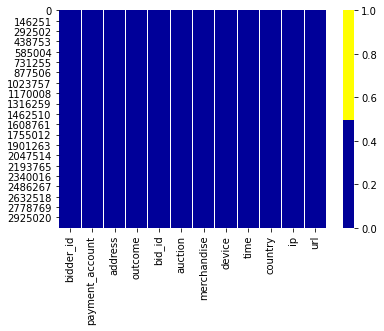

In [12]:
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data.isnull(), cmap=sns.color_palette(colours))

The above chart maps the missing datas in the dataset in yellow color. As it is all blue, we can assert that there is no missing data in the main dataset. However, as this last contains more than 3 million entries, while this chart is useful to give us a big picture of the quality of the merged dataset, we can't be sure that there is absolutely 0 missing data. Thus, in the next cell, we will take a more granular approach to identify potential missing datas in each columns.

In [13]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col,(pct_missing*100)))

bidder_id - 0.0%
payment_account - 0.0%
address - 0.0%
outcome - 0.0%
bid_id - 0.0009442400219063686%
auction - 0.0009442400219063686%
merchandise - 0.0009442400219063686%
device - 0.0009442400219063686%
time - 0.0009442400219063686%
country - 0.0888888020622202%
ip - 0.0009442400219063686%
url - 0.0009442400219063686%


This output shows us that there very few missing datas that mainly concern the original columns of the bid dataset. As we merged both dataset based on the bidder_id column, we can guess that there exist some of bidder_id that do not have any bids. Let's look closer at the bidder_id column and check the number on null values.

In [14]:
bidder_id_null_values = data[pd.isnull(data['bid_id'])]['bidder_id'].unique()
len(bidder_id_null_values)

29

There are 29 bidder_id that don't have any corresponding bids in the main dataset. To make a decision about whether we delete these rows or replace them, we will refer to our main goal which is identifying the behaviour differences between bots and human on auctions. Let's check if these missing data points come from a human or a robot source.

In [15]:
data[data['bidder_id'].isin(bidder_id_null_values)]['outcome']

17583      0.0
42424      0.0
129439     0.0
214915     0.0
221776     0.0
226432     0.0
255107     0.0
305088     0.0
333331     0.0
409451     0.0
654549     0.0
657208     0.0
788183     0.0
790914     0.0
794927     0.0
810369     0.0
883351     0.0
1018748    0.0
1019599    0.0
1021349    0.0
1123023    0.0
1139921    0.0
1217466    0.0
1465813    0.0
1482542    0.0
1648201    0.0
1974826    0.0
2139077    0.0
2999380    0.0
Name: outcome, dtype: float64

The output shows us that the missing data points only comes from a human source. As we are more focusing on bots in our general analysis, we will just ignore them.

In [16]:
data = data[~data['bidder_id'].isin(bidder_id_null_values)]

In [17]:
pd.isnull(data).any()

bidder_id          False
payment_account    False
address            False
outcome            False
bid_id             False
auction            False
merchandise        False
device             False
time               False
country             True
ip                 False
url                False
dtype: bool

There are still some missing values within the country column. Let's check if the number of NaN is meaningful and if we can drop them without affecting too much the dataset.

In [18]:
country_miss_ratio = pd.isnull(data['country']).sum()/len(data)*100
print('The proportion of missing entries in the country column is about ' + str(round(country_miss_ratio,2)) + "%")

The proportion of missing entries in the country column is about 0.09%


Thus, we can simply drop them from the dataset. Let's check now if our dataset is clean and ready for further analysis.

In [19]:
data = data.dropna()
pd.isnull(data).any()

bidder_id          False
payment_account    False
address            False
outcome            False
bid_id             False
auction            False
merchandise        False
device             False
time               False
country            False
ip                 False
url                False
dtype: bool

## **1.3. Identify outliers**

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3068523 entries, 0 to 3071252
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   bidder_id        object 
 1   payment_account  object 
 2   address          object 
 3   outcome          float64
 4   bid_id           float64
 5   auction          object 
 6   merchandise      object 
 7   device           object 
 8   time             float64
 9   country          object 
 10  ip               object 
 11  url              object 
dtypes: float64(3), object(9)
memory usage: 304.3+ MB


Looking closer at our dataset, there are 3 columns containing numeric values : outcome (ranged between 0 and 1), bid_id and time. As the bid_id columns has not any logical order or specific meaning, as well as the time column which has been obfuscated, it is not possible to identify specific outliers thanks as there are no specific expected ranges in which we expect data points to be ordered.

## **1.4. Uninformative / Repetitive data points**

In this section, we will check if some column are uninformative based on the fact that it has too many rows being the same value. Thus, I will create a list of features with a high percentage of the same value. Let's display the features with over 95% rows being the same value.

In [21]:
num_rows = len(data.index)
low_information_cols = [] #

for col in data.columns:
    cnts = data[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.90:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

There are not any columns with more that 95% of its rows containing the same value. Thus, there are no reasons for us to investigate further to eventually drop a feature.

Here we are ! The dataset is ready to be used, let's start the analysis by answering intermediary questions in part 2.

# **PART 2.INTERMEDIARY QUESTIONS**

## **2.1. How much unique ip addresses is there per auction ?**

In [22]:
unique_ip_per_auction = data.groupby('auction')['ip'].nunique()

In [23]:
unique_ip_per_auction = unique_ip_per_auction.sort_values(ascending = False)

In [24]:
final_df_1 = pd.DataFrame(unique_ip_per_auction)

In [25]:
final_df_1 = final_df_1.reset_index()

In [26]:
final_df_1 = final_df_1.rename(columns={"auction": "unique_auctions", "ip": "n_unique_ip_address"}).sort_values("n_unique_ip_address",ascending = False)

In [27]:
final_df_1.to_csv (r'/Users/tangigouez/Desktop/question_1.csv', index = False, header=True)

In [28]:
final_df_1.head()

,unique_auctions,n_unique_ip_address
0,jqx39,126460
1,jefix,16404
2,opnq4,13725
3,du967,11537
4,i506w,10633


In [29]:
final_df_1.describe()

,n_unique_ip_address
count,12740.000000
mean,122.328414
std,1219.153492
min,1.000000
25%,3.000000
50%,14.000000
75%,57.000000
max,126460.000000


There are 12 740 different auctions in the dataset. The one with the most unique ip addresses is "jqx39", far above the other auctions as the second one contains 110 856 less unique ip adresses. The mean of unique ip adresses per auction is around 122 per auction, considering this number, I will investigate further in the third part why some auctions have so much more unique ips than other and if an auction is more likely to be populated by bots when there are more ips.

## **2.2. Which is the country with the maximum number of bids per merchandise type ?**

In [30]:
unique_country_per_merchandise = data.groupby('merchandise')['country'].value_counts()

In [31]:
merchandise_type = data["merchandise"].unique()

In [32]:
merchandise_type

array(['home goods', 'office equipment', 'sporting goods',
       'books and music', 'mobile', 'jewelry', 'computers', 'clothing',
       'furniture', 'auto parts'], dtype=object)

In [33]:
merchandise = []
country = []
n_bids = []
for element in merchandise_type:
    sliced_df = bids[["merchandise","country"]] 
    condition = sliced_df["merchandise"]== element
    output_1 = sliced_df[condition]["country"].value_counts().head(1).index.tolist()
    output_2 = sliced_df[condition]["country"].value_counts().head(1).tolist()
    merchandise.append(element)
    country.append(output_1)
    n_bids.append(output_2)

In [34]:
final_df_2 = pd.DataFrame({"merchandise type": merchandise,
                           "country": country,
                           "n_bids": n_bids
                          }).sort_values("n_bids",ascending = False)

In [35]:
final_df_2.to_csv(r'/Users/tangigouez/Desktop/question_2.csv', index = False, header=True)

In [36]:
final_df_2

,merchandise type,country,n_bids
4,mobile,[in],[578076]
5,jewelry,[in],[560773]
2,sporting goods,[in],[346852]
0,home goods,[in],[169649]
1,office equipment,[in],[56140]
8,furniture,[in],[47031]
6,computers,[th],[16731]
3,books and music,[in],[11820]
7,clothing,[in],[7619]
9,auto parts,[in],[2243]


Overall, we can observe from the dataframe that the country labelled "in" is the top country in terms of number of bids in 90% of the merchandise types. Why this country is so much dominant in terms of number of bids in each of the merchandise type ? Is there some particularities linked to this specific country ? I will investigate it further in part 3.

## **2.3. What is the fraction of times a bid is identified as coming from a robot for each country ?**

For each country, compute the fraction of times a bid from that country was identified as coming from a robot.

In [39]:
country = []
robot = []
total = []
for c in data.groupby('country'):
    a = data[data['country'] == c[0]].count()[1]
    b = data[(data['country'] == c[0]) & (data['outcome'] == 1.0)].count()[1]
    country.append(c[0])
    robot.append(b)
    total.append(a)
final_df_3 = pd.DataFrame({'country': country, 'robot': robot, 'total': total})
final_df_3['%robot'] = final_df_3['robot'] / final_df_3['total'] *100
final_df_3.sort_values("%robot",ascending = False).dropna().head(10)

,country,robot,total,%robot
130,nc,11,11,100.000000
190,vi,8,8,100.000000
66,gi,1,1,100.000000
70,gp,2,2,100.000000
6,an,1,1,100.000000
11,aw,7,7,100.000000
171,tc,1,1,100.000000
119,mo,140,143,97.902098
92,jp,7921,8419,94.084808
96,kr,6340,6974,90.909091


In [41]:
final_df_3.describe()

,robot,total,%robot
count,198.000000,198.000000,198.000000
mean,2081.580808,15497.590909,22.442484
std,8238.020367,57728.973734,26.370298
min,0.000000,1.000000,0.000000
25%,13.000000,167.250000,3.544110
50%,131.000000,1717.500000,12.414902
75%,728.750000,7125.500000,28.151337
max,86386.000000,645631.000000,100.000000


In [40]:
final_df_3.to_csv(r'/Users/tangigouez/Desktop/question_3.csv', index = False, header=True)

From this dataframe, we can identify that some countries such as "gp" and "tc" only have robots sending bids on the auctions. However, to make this data more meaningful, we should put them in perspective with the total number of bids sent by these countries. 
There are also some countries which haven't any robots sending bids, as the minimum bot ratio is 0%. 
Overall, the average bot ratio for each country is around 11%. 

# **PART 3. DATA VISUALISATION**

This section is aimed to visualise the main insights emerging from the dataset. The analysis is organized in three parts :
- **1 -** In the first one, I will plot the proportion of robots among bidders and within each merchandise. This should give you a big picture of the dataset
- **2 -** In the second part, I will study the correlation between the number of bids and the robot presence per auction, device and country. 
- **3 -** Finally in the third part, I will focus on the patterns that may help differentiate a robot bidder from a human

## **3.1. Overview of the dataset**

[Text(0, 0.5, 'Number of bidders'), Text(0.5, 0, '0.0 = Human vs 1.0 = Robot')]

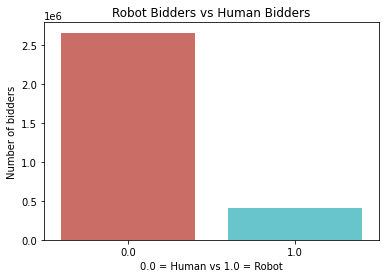

In [467]:
ax = sns.countplot(x='outcome',data = data,palette="hls")
sns.set_color_codes("pastel")
plt.title('Robot Bidders vs Human Bidders')
ax.set(xlabel='0.0 = Human vs 1.0 = Robot', ylabel='Number of bidders')

In [390]:
p_robot = round(((data[data['outcome']==1].count())/(data['outcome'].count())),3)*100
p_human = 100 - p_robot
print('There is '+ str(p_robot['outcome'])+' % of robot bidders in the dataset')
print('There is '+ str(p_human['outcome'])+' % of human bidders in the dataset')

There is 13.4 % of robot bidders in the dataset
There is 86.6 % of human bidders in the dataset


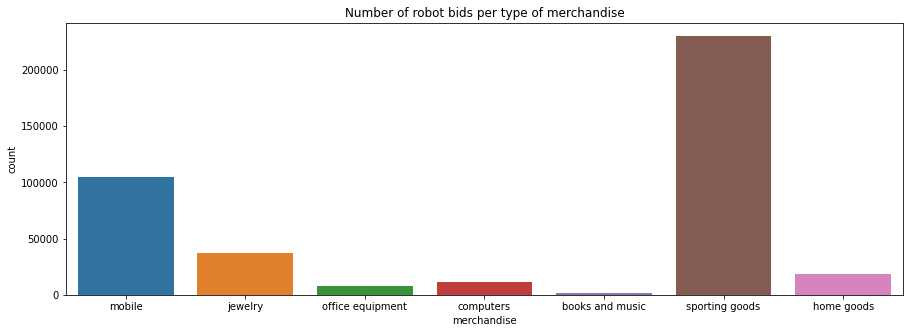

In [391]:
robot = data[data['outcome'] == 1.0]
human = data[data['outcome'] == 0.0]
plt.figure(figsize=(15,5))
plt.title('Number of robot bids per type of merchandise')
sns.countplot(x="merchandise",data = robot)

The first chart compares the number of bids coming from robots against humans. Overall, we can see that there are much more human bidders active on the platform as they concern around 87% of all bids. 
The second chart plots the number of bids coming from robots in each merchandise. As you can see, the number of bids coming from robots is not equally distributed on each merchandise, they are clearly more numerous on sporting goods and mobile ones. Some merchandises such as books and music and office equipment nearly don't contain any robot bidders.

## **3.2. Study of the correlation between the number of bids and the robot presence**

In [300]:
# proportion of robots per device
bots_vs_humans_device = (data[data['outcome'] == 1].groupby(
    'device').size()/data.groupby('device').size())*100
bots_vs_humans_device = bots_vs_humans_device.fillna(0)
bots_vs_humans_device = bots_vs_humans_device.to_frame()
bots_vs_humans_device.columns = ['%bots']
bots_vs_humans_device['n_bids'] = data.groupby('device').size()
bots_vs_humans_device = bots_vs_humans_device.reset_index()

#proportion of robots per auction
bots_vs_humans_auction = (data[data['outcome'] == 1].groupby(
    'auction').size()/data.groupby('auction').size())*100
bots_vs_humans_auction = bots_vs_humans_auction.fillna(0)
bots_vs_humans_auction = bots_vs_humans_auction.to_frame()
bots_vs_humans_auction.columns = ['%bots']
bots_vs_humans_auction['n_bids'] = data.groupby('auction').size()
bots_vs_humans_auction = bots_vs_humans_auction.reset_index()

#proportion of robots per country
bots_vs_humans_country = (data[data['outcome'] == 1].groupby(
    'country').size()/data.groupby('country').size())*100
bots_vs_humans_country = bots_vs_humans_country.fillna(0)
bots_vs_humans_country = bots_vs_humans_country.to_frame()
bots_vs_humans_country.columns = ['%bots']
bots_vs_humans_country['n_bids'] = data.groupby('country').size()
bots_vs_humans_country = bots_vs_humans_country.reset_index()

Text(0, 0.5, 'Number of countries')

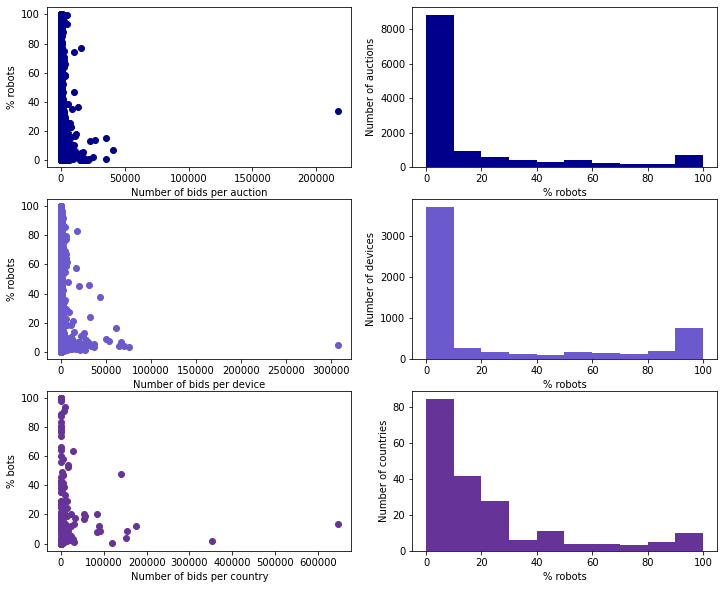

In [472]:
fig = plt.figure(figsize = (12,10))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)

ax1.scatter(bots_vs_humans_auction['n_bids'],bots_vs_humans_auction['%bots'], c = 'darkblue')
ax1.set_xlabel("Number of bids per auction")
ax1.set_ylabel("% robots")

ax2.hist(bots_vs_humans_auction['%bots'], bins = 10, color = 'darkblue')
ax2.set_xlabel("% robots")
ax2.set_ylabel("Number of auctions")

ax3.scatter(bots_vs_humans_device['n_bids'],bots_vs_humans_device['%bots'], c = 'slateblue')
ax3.set_xlabel("Number of bids per device")
ax3.set_ylabel("% robots")

ax4.hist(bots_vs_humans_device['%bots'], bins = 10, color = 'slateblue')
ax4.set_xlabel("% robots")
ax4.set_ylabel("Number of devices")

ax5.scatter(bots_vs_humans_country['n_bids'],bots_vs_humans_country['%bots'], c = 'rebeccapurple')
ax5.set_xlabel("Number of bids per country")
ax5.set_ylabel("% bots")

ax6.hist(bots_vs_humans_country['%bots'], bins = 10, color = 'rebeccapurple')
ax6.set_xlabel("% robots")
ax6.set_ylabel("Number of countries")

The scatter plots on the left show the correlation between the number of bids and the poportion of robots respectively per auctions, devices and countries. There is not any positive or negative correlation between the number of bids and the proportion of robots. Thus, we can't say that the higher number of bids, the higher the proportion of robots and conversely.  

The histograms on the left plot the distribution of the proportion of robots respectively per auctions, devices and countries. We can oberve that most auctions, devices and countries present a low proportion of robots, between 0% and 10%. Each of the distribution confirm our observation on the first plot in the overview of the dataset, there are much less robots than human.

## **3.3. Analysis of the robot bidders patterns**

In [423]:
n_country_robot = robot[['bidder_id','country']].drop_duplicates().groupby('bidder_id').count()['country']
n_country_human = human[['bidder_id','country']].drop_duplicates().groupby('bidder_id').count()['country']
avg_country_robot = round(n_country_robot.mean())
avg_country_human = round(n_country_human.mean())
n_ip_robot = robot[['bidder_id','ip']].drop_duplicates().groupby('bidder_id').count()['ip']
n_ip_human = human[['bidder_id','ip']].drop_duplicates().groupby('bidder_id').count()['ip']
avg_ip_robot = round(n_ip_robot.mean())
avg_ip_human = round(n_ip_human.mean())

In [460]:
summary = pd.DataFrame({'category': ['robot','human'],
              'Avg_countries_bidder' : [avg_country_robot,avg_country_human],
              'Avg_ip_bidder': [avg_ip_robot, avg_ip_human]
             })
summary.set_index('category')

,Avg_countries_bidder,Avg_ip_bidder
category,,
robot,26,2386
human,13,580


Text(0.5, 1.0, 'Average number of countries used by bidder')

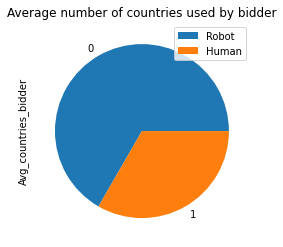

In [461]:
summary['Avg_countries_bidder'].plot(kind='pie')
pie =plt.legend()
pie.get_texts()[0].set_text('Robot')
pie.get_texts()[1].set_text('Human')
plt.title('Average number of countries used by bidder')

Text(0.5, 1.0, 'Average number of ip addresses used by bidder')

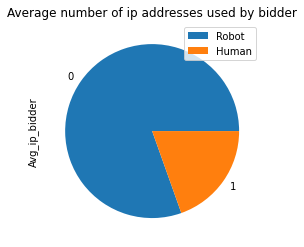

In [462]:
summary['Avg_ip_bidder'].plot(kind='pie')
pie =plt.legend()
pie.get_texts()[0].set_text('Robot')
pie.get_texts()[1].set_text('Human')
plt.title('Average number of ip addresses used by bidder')

The first pie compares the average number of countries used respectively by robot and human bidders. The second one compares the average number of ip adresses used respectively by robot and human bidders.

We can clearly observe interesting patterns emerging from robots bidders. Indeed, a robot bidder is much more likely than a human to use different ip addresses (26 on average against 13 for humans) and to be present in more different countries (2386 on average against 580 for humans).

## **3.4. Conclusions**

Overall, I recommand Facebook to overlook more closely the mobile and sporting goods merchandises, as they are more likely to contain robot bidders. Furthermore, as we identified specific patterns differentiating human and bot bidders, I also recommend Facebook to track closely the number of countries and ip adresses used by a unique bidder. If both of these indicators are above the human average, the platform should sanction the bidder and block his access to the platform. 